# <center> Machine learning project
### Authors: GILDAS Deudibe 
### Date: October 2022

##### Import packages needed during this project:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm

from sklearn.datasets import make_blobs
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # To standardize for knn (since it involve calculation of distance)

import scipy.linalg as la
import statsmodels.api as sm





##### Question 1 : Graphical illustration of the central limit theore

###### Theorem: 
The sample mean $\bar{X}$ of any identical distributed variable X converge to a normal distribution, as sample size grows. Put that differently, the convergence is achieved regardless of the distribution from which we are sampling from. In this example, we will be generating 6 differents samples mean from a uniform distribution (between 10 and 40), with growing size and assess the distribution as sample size enlarge. Formally, the central limit theorem is stated as follow:

$$\sqrt{n}(\bar{X} - \mu_x)/\sigma_x \leadsto  \mathcal{N}(0,1).$$

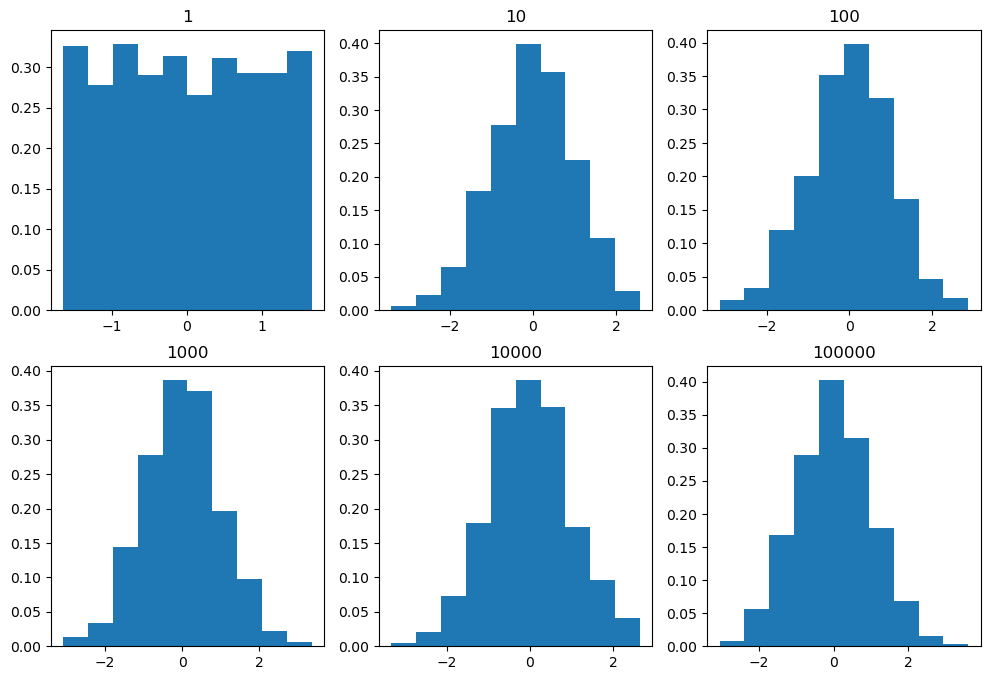

In [687]:
num = [1, 10, 100, 1000, 10000, 100000]      # differen sample size
# list of sample means
means = [] 
meany = []
 
# Generating 1, 10, 100, 1000, 10000, 100000 random numbers from 100 to 40 (uniform distribution)
# taking their mean and appending it to a list means.
for j in num:
    np.random.seed(1)              # Generating seed so that we can get same result every time we run
    x = [np.mean(np.random.randint(10, 40, j)) for i in range(1000)]
    y = (x - np.mean(x))/np.std(x)    # the term np.std(x) is the standard deviation of the sample mean, 
                                      #so it includes the factor np.sqrt(j) in there.
    means.append(x)
    meany.append(y)
len(meany)

k = 0
 
# plotting all distributions of means in one figure
fig, ax = plt.subplots(2, 3, figsize =(12, 8))
for i in range(0, 2):
    for j in range(0, 3):
        # Histogram for each x stored in means
        ax[i, j].hist(meany[k], 10, density = True)
        ax[i, j].set_title(label = num[k])
        k = k + 1
plt.show()

It is evident from the graph above that, as we keep on increasing the sample size from 1 to 100000 the histogram tends to take the shape of a normal distribution. We started with a uniform distribution that has no reason to converge initially to a normal distribution (to not biased the result). We could have started with any given distribution (Gamma, beta, exponential, etc.) and we will observe the convergence toward normal distribution. One thing so powerfull we can observe from the graph, is that the onvergence is almost achieved starting at n = 100, meaning that the central limit theorem does not necessarily required exceptional large n. (Usually starting from n=30 is enough).

##### Question 2 : Gradient algorithm

Run a gradient algorithm to find the solution to $x : Ax = b$ where $ b = (1, . . . , 1) \in {\rm I\!R}^{p}$ and
$ A \in {\rm I\!R}^{p*p} , p = 100 $ is the upper triangular matrix with only ones. 


$$ Ax = b  \Leftrightarrow \lVert Ax -b \rVert^2 =0 \Leftrightarrow  ({Ax - b})^\intercal)(Ax -b) = 0$$. 

One can take the loss function as  $ L(A, x, b) = ({Ax - b})^\intercal)(Ax -b)$ which result in the following gradient $G(A, x, b) = G(x) = 2A^\intercal(Ax -b)$. The loss function is convex since $A^{\intercal}A$ is a symetric matrix of real values. As a result, a local minimum if it exists (we will show it exist), is a global minimum.

The descent gradient algorithm is given by : $$ x_{n+1}= x_{n}-\gamma \nabla G(x_{n}) $$ where $ \gamma$ is the learning rate

We start by defining matrix size p, matrix A, vector b and starting point x_0 as defined in the exercise. 

In [688]:
p =100
A = np.triu(np.ones(p), 0)
b = np.ones(p)
x_0 = np.zeros(p)

We first define our loss function, then defined the gradient function followed by the algorithm that update the value of x (the value that suppose to converge to the solution of the problem). Finally, we run the algorith iteratively to lead to the solution.

In [689]:
def loss(A, x, b):                   #Define te loss function
    return np.dot((np.dot(A, x) - b).T , (np.dot(A, x) - b))


def gradient(A, x, b):                #Define the gradientfunction for the loss function
    k = np.dot(A, x) -b
    dG = 2*np.dot(A.T, k)
    return dG

def gradient_algorithm(A, x, b, learning_rate=0.0001): #Define the gradient descent algorithm
    x = x - learning_rate * gradient(A, x, b)
    return (x)



def algorithm_iteration(A, b, learning_rate = 0.0001, n_iter = 1000): # algorithm with number of iterations
    # initialisation of x
    x = x_0

    Loss = []
    grad = []
    for i in range(n_iter):
        #A = model(X, W, b)
        Loss.append(loss(A, x, b))
        dG = gradient(A, x, b)
        x = x - learning_rate * gradient(A, x, b)
        grad.append(dG)
    plt.plot(Loss, 'b.')
    #Loss
    return (x, Loss)


For a learning rate of 0.0001 and 1000 iterations, We can see that the Loss function converge to a plateau that stay almost constant at some point. Since the function is convex, this solution that the converge to is the solution to our inital problem.

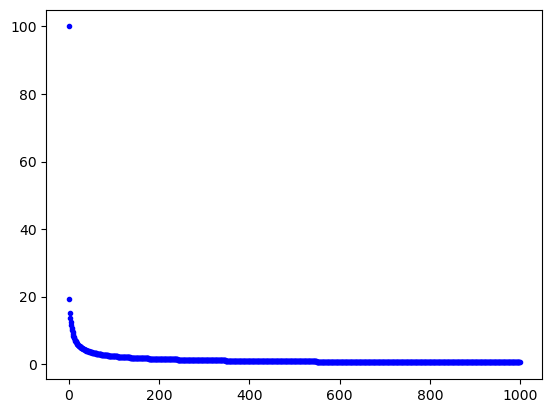

In [690]:
my_results_1000_iterations = algorithm_iteration(A, b, 0.0001, 1000)

In [493]:
my_results_1000_iterations

(array([ 2.57265183e-08,  4.93661058e-08,  6.88540577e-08,  8.21715091e-08,
         8.73717902e-08,  8.26107971e-08,  6.61825409e-08,  3.65608766e-08,
        -7.55179045e-09, -6.71682821e-08, -1.42952682e-07, -2.35148781e-07,
        -3.43501518e-07, -4.67172533e-07, -6.04651515e-07, -7.53665705e-07,
        -9.11090649e-07, -1.07286609e-06, -1.23392179e-06, -1.38811892e-06,
        -1.52821373e-06, -1.64585099e-06, -1.73159580e-06, -1.77501295e-06,
        -1.76480401e-06, -1.68901266e-06, -1.53530881e-06, -1.29136236e-06,
        -9.45316114e-07, -4.86366784e-07,  9.45397546e-08,  8.03895227e-07,
         1.64469845e-06,  2.61541341e-06,  3.70882871e-06,  4.91083931e-06,
         6.19918185e-06,  7.54216658e-06,  8.89746285e-06,  1.02110108e-05,
         1.14161493e-05,  1.24330695e-05,  1.31687229e-05,  1.35173333e-05,
         1.33616829e-05,  1.25753594e-05,  1.10261670e-05,  8.58091188e-06,
         5.11177592e-06,  5.04477697e-07, -5.33160257e-06, -1.24512071e-05,
        -2.0

The algorith started converging very fast at the begining (it went from a loss function equal to 100 at x0=0, to a loss function equal to 20 in the next iteration), then the rate of convergence decrease dramatically. After 1000 iterations, the loss function converge to a value of 0.48. the solution x however converge to the vector of length equa to p that all component are equal to zero except for the last one that equal 1. 

$$ x = (0, 0, 0, ......, 0, 0, 1) \in {\rm I\!R}^{p}$$

Obviously, with a large number of iterations, we reach a far better precision. for example with 50000 iterations, the loss reach the value of 0.00007 as we can see below.

6.73302185015008e-05

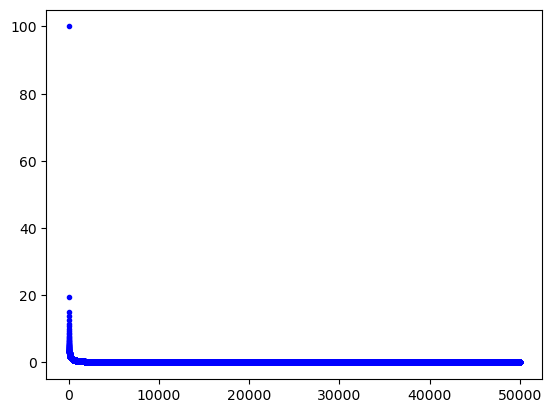

In [501]:
algorithm_iteration(A, b, 0.0001, 50000)[1][-1]

##### Question 3: Run a stochastic version of the previous algorithm (Stochastic Gradient Descent)

The stochastic version of the gradient descent follow the same approach as the deterministic gradient except for the fact that we intoduce a randomness by selecting a subsample of the optimization problem and aggregate over them to derive the gradient and the final result. 

In simple terms, Stochastic gradient descent can be regarded as a stochastic approximation of gradient descent optimization, since it replaces the actual gradient by an estimate from a randomly selected subset of the data). This is super helpful in high-dimensional optimization problems

In this case specifically, we introduce couple of batches specified randomly to select across, perform computations and aggregate over. 

In [691]:
def minibatch_gradient_descent(A,b,learning_rate=0.0001,iterations=1000,batch_size =20):
    x = x_0
    m = len(b)
    Loss = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        lossr =0.0
        indices = np.random.permutation(m)
        A = A[indices]
        b = b[indices]
        for i in range(0,m,batch_size):
            A_i = A[i:i+batch_size, :]
            b_i = y[i:i+batch_size]
            x = x -learning_rate*gradient(A_i, x, b_i)
            lossr += loss(A_i, x, b_i)
        Loss[it]  = lossr
        
    return x, Loss

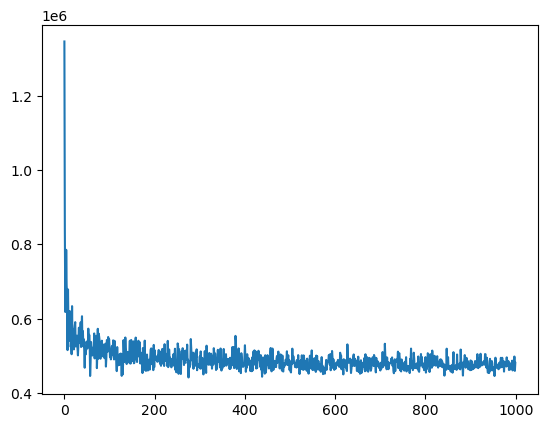

In [686]:
sd = minibatch_gradient_descent(A, b)
plt.plot(sd[1])

We observe similiar trend in the stochastic approach as in the deterministic gradient. From 1000 iterations, our algortihm reach a loss value of less than 0.5.

##### Question 4

First, I import the data without standardise it. 

In [3]:
from sklearn.datasets import load_diabetes
data = load_diabetes(return_X_y=False, as_frame=True, scaled=False)
df = data.frame
Xs = df.drop(['target'], axis=1)
ys = df['target']


print(f'Xs contain {Xs.shape[0]} sample and {Xs.shape[1]} variables')
print(f'ys is a continious variable that values goes from {np.min(ys)} to {np.max(ys)}')

Xs contain 442 sample and 10 variables
ys is a continious variable that values goes from 25.0 to 346.0


The target variable y is a continious variable, meaning that the knn to perform is to solve a regression problem, not classification. Let's have a quick look at the first 5 observations of our data.

In [4]:
print(Xs.head())   #Print the first 5 rows of the data
print(ys.head())   #Print the first 5 rows of the target serie

    age  sex   bmi     bp     s1     s2    s3   s4      s5    s6
0  59.0  2.0  32.1  101.0  157.0   93.2  38.0  4.0  4.8598  87.0
1  48.0  1.0  21.6   87.0  183.0  103.2  70.0  3.0  3.8918  69.0
2  72.0  2.0  30.5   93.0  156.0   93.6  41.0  4.0  4.6728  85.0
3  24.0  1.0  25.3   84.0  198.0  131.4  40.0  5.0  4.8903  89.0
4  50.0  1.0  23.0  101.0  192.0  125.4  52.0  4.0  4.2905  80.0
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64


In [5]:
Xs.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,48.518100,13.109028,19.0000,38.2500,50.00000,59.0000,79.000
sex,442.0,1.468326,0.499561,1.0000,1.0000,1.00000,2.0000,2.000
bmi,442.0,26.375792,4.418122,18.0000,23.2000,25.70000,29.2750,42.200
bp,442.0,94.647014,13.831283,62.0000,84.0000,93.00000,105.0000,133.000
s1,442.0,189.140271,34.608052,97.0000,164.2500,186.00000,209.7500,301.000
s2,442.0,115.439140,30.413081,41.6000,96.0500,113.00000,134.5000,242.400
s3,442.0,49.788462,12.934202,22.0000,40.2500,48.00000,57.7500,99.000
s4,442.0,4.070249,1.290450,2.0000,3.0000,4.00000,5.0000,9.090
s5,442.0,4.641411,0.522391,3.2581,4.2767,4.62005,4.9972,6.107
s6,442.0,91.260181,11.496335,58.0000,83.2500,91.00000,98.0000,124.000


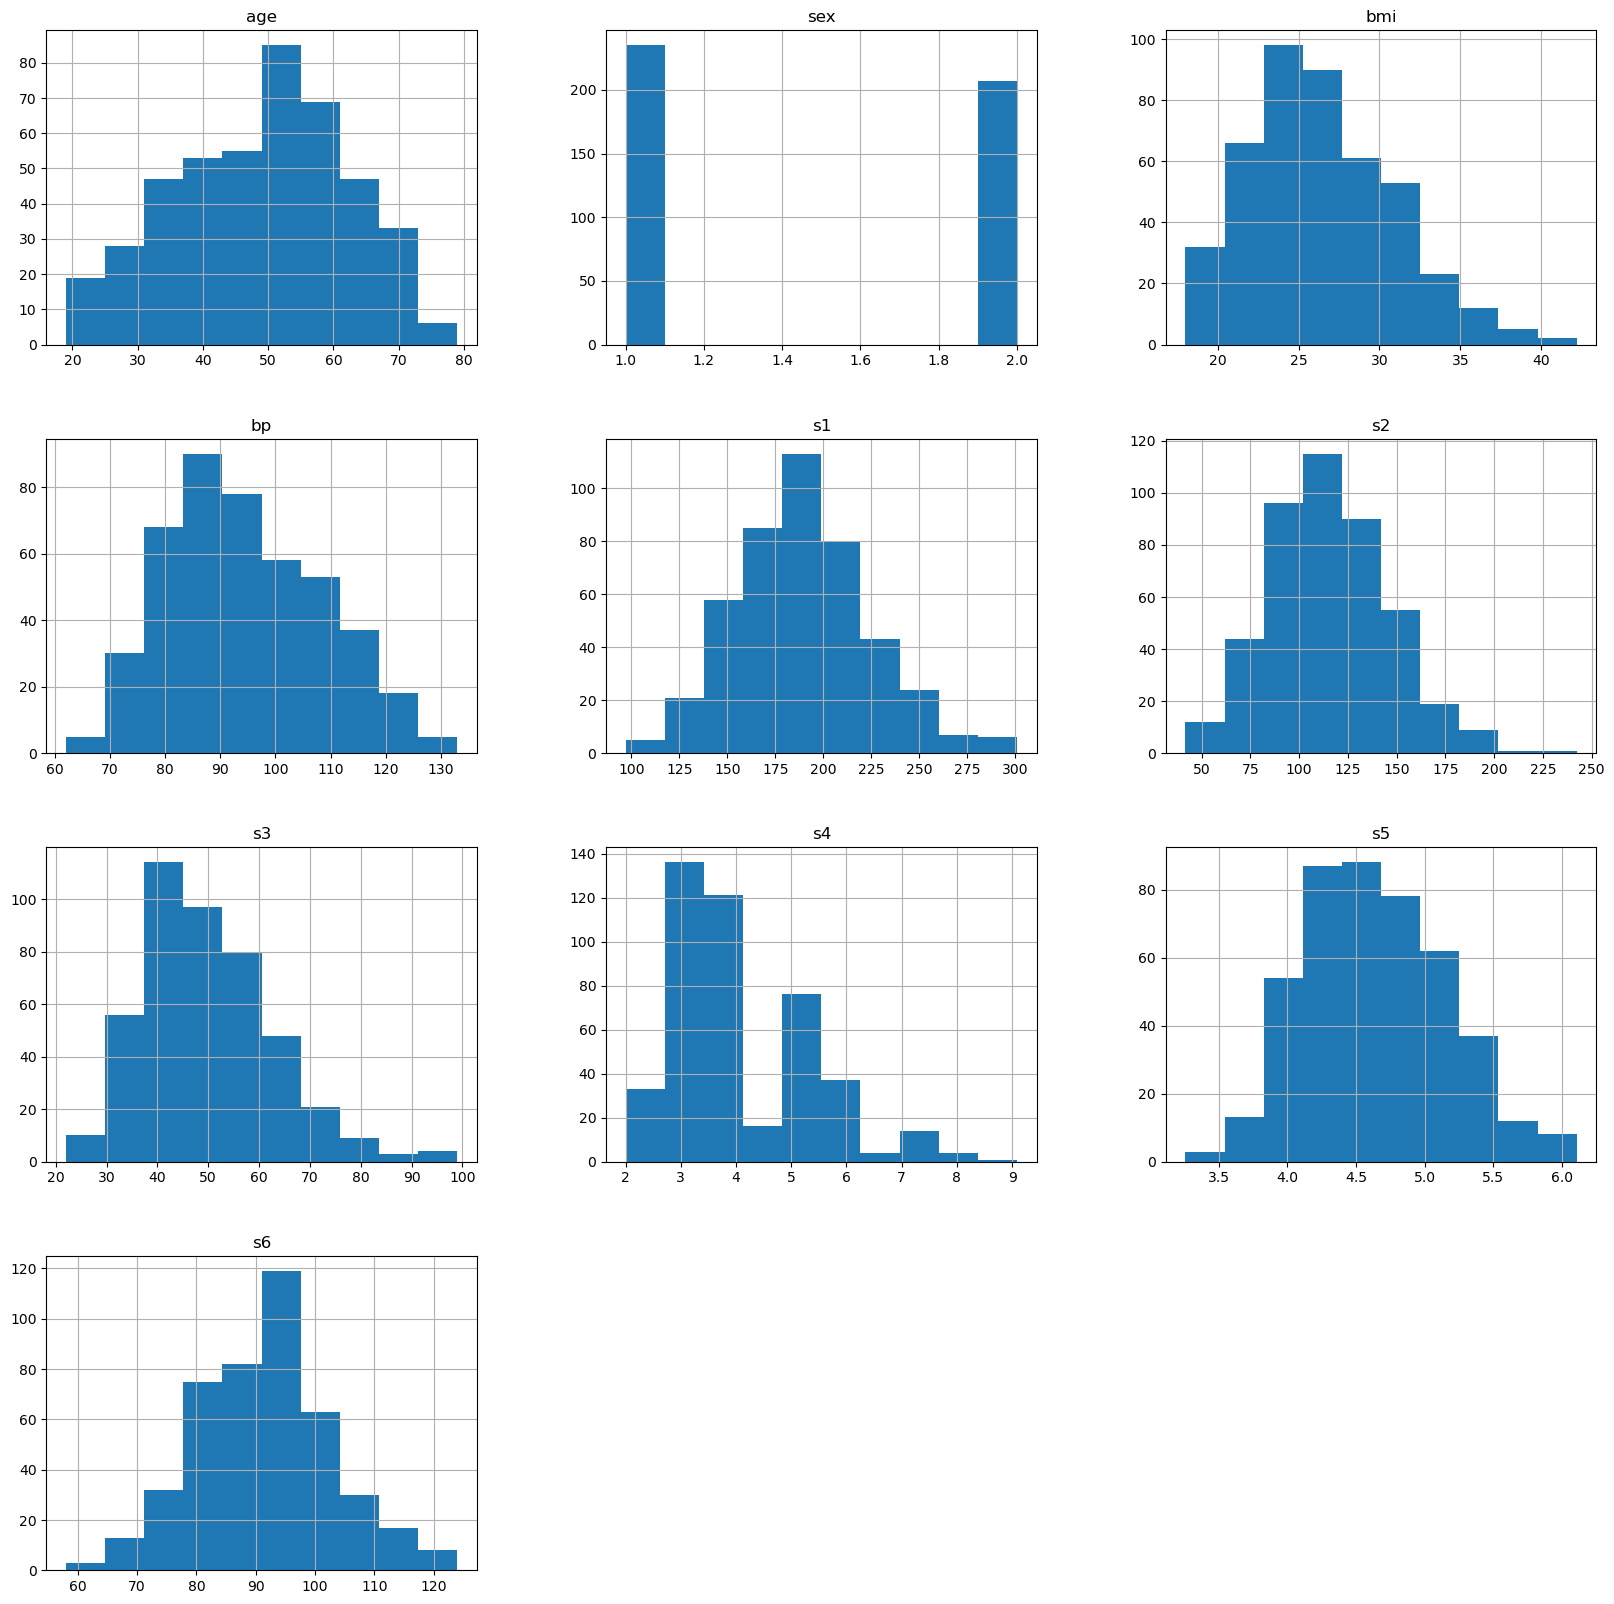

In [31]:
p = Xs.hist(figsize = (20,20))                          

Sex is the only categorical variable in the data (1 means male and 2 means female). Since knn will be dealing with caluation of distances, it does not make more sense to include the sex variable in the algorithm (the variable could have been coded 5 for male and 7 for female, which should not in principle change our result, but the distance using such a labelling will be changing the result). Let's however recall that one solution is to use onehotencoding (or any sort of encoding) for the processing of 'sex' variable, so that we can keep it in our Knn algorthm.

Also, variables are obviously of different magnitude. To prevent large scale variable to play important role compared to others, I re-import the data and make sure the data is standardized. I will be dropping the sex variable as well.

In [6]:
from sklearn.datasets import load_diabetes
data = load_diabetes(return_X_y=False, as_frame=True, scaled=True)  #Standadized the variable
df = data.frame
X = df.drop(['target'], axis=1)
y = df['target']


In [7]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


I also split the data into train and test datasets with a 70% for training and 30% for test data (we could have choose a different proportion like 80 vs 20, though).


In [15]:
np.random.seed(42)
train , test = train_test_split(df, test_size = 0.3)
x_train = train.drop(['target', 'sex'], axis=1)
y_train = train['target']

x_test = test.drop(['target', 'sex'], axis = 1)
y_test = test['target']


For the sake of comparison over differents values of k, we use Root Mean Square Error (RMSE). Although I am interested only on evaluating the error on the test data, I also plot error on the train data for the sake of presentation only.

In [16]:
rmse_val = []                         #to store rmse values for different k of test data
rmse_train = []
for K in range(30):                   #run a knn for different values of neighbors k from 1 to 30
    K = K+1                           
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)      #fit the model
    pred=model.predict(x_test)       #make prediction on test set
    pred_train = model.predict(x_train)       
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    error_train =sqrt(mean_squared_error(y_train,pred_train)) 
    rmse_val.append(error)            #store rmse values
    rmse_train.append(error_train)
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 73.8183097689378
RMSE value for k=  2 is: 59.540865476193204
RMSE value for k=  3 is: 58.302942316033814
RMSE value for k=  4 is: 55.95666623594191
RMSE value for k=  5 is: 55.716470749518535
RMSE value for k=  6 is: 54.78292775064446
RMSE value for k=  7 is: 54.11294798932262
RMSE value for k=  8 is: 54.390102474443374
RMSE value for k=  9 is: 53.6278928894089
RMSE value for k=  10 is: 53.65934810541165
RMSE value for k=  11 is: 54.361388564918215
RMSE value for k=  12 is: 54.07749697221834
RMSE value for k=  13 is: 54.59558940378242
RMSE value for k=  14 is: 54.66937044128852
RMSE value for k=  15 is: 54.85313359931373
RMSE value for k=  16 is: 54.513109702752104
RMSE value for k=  17 is: 54.20399602143585
RMSE value for k=  18 is: 54.16035093741351
RMSE value for k=  19 is: 54.65034221859153
RMSE value for k=  20 is: 55.09030436781364
RMSE value for k=  21 is: 54.92956168867955
RMSE value for k=  22 is: 54.83516364354019
RMSE value for k=  23 is: 54.64424974

In [17]:
best_k = np.argmin(rmse_val)
best_k

8

In [18]:
print(f'The number of neighbor that result in the smallest error is k = {best_k}')

The number of neighbor that result in the smallest error is k = 8


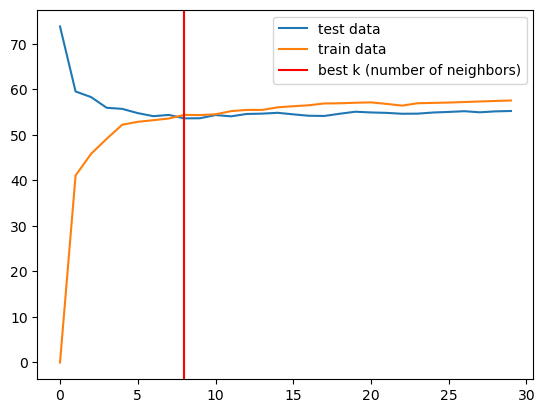

In [19]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
plt.plot(curve, label='test data')
curve_train = pd.DataFrame(rmse_train) 
plt.plot(curve_train, label='train data')
plt.axvline(x = best_k, color = 'r', label = 'best k (number of neighbors)')
plt.legend()
plt.show()

##### Question 5: Select the most important variables using the method of your choice.

There are actually plenty of method to select most important variables in regression setting. One can name regularization method such Lasso, forward and backward reression (based on a given criteria), PCA followed by an OLS, etc. Unlike all these methods that reward variable with prediction power and penalize those with no prediction power, the PCA before OLS has a drawback of not implying the predictor in the PCA process. Having said that we will be using a forward approach based on critera of p-values of a linear regression (variable with significant small p-values will be retained).


The forward selection approach is defined as follows:

In [20]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
            
        else:
            break
    return best_features

By runing the forward selection approach on our data it follows: 

In [21]:
important_variables = forward_selection(X, y)
important_variables

/tmp/ipykernel_201037/1361044312.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
/tmp/ipykernel_201037/1361044312.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
/tmp/ipykernel_201037/1361044312.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
/tmp/ipykernel_201037/1361044312.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
/tmp

['bmi', 's5', 'bp', 's1', 'sex', 's2']

Our procedure select 6 variables which are "['bmi', 's5', 'bp', 's1', 'sex', 's2']". For the reason we explained before (sex being a categorical variable), we updated "most important variables" by removing the variable  'sex'. 

In [22]:
important_variables.remove('sex')

In [23]:
important_variables

['bmi', 's5', 'bp', 's1', 's2']

##### Question 6 : Evaluate the nearest neigbor algorithm on different values of k based on the most important variables


First, we subset the list of our variable to the most importants variables found in the previous question. Those variables are 'bmi' (body mass index), 's5', 'bp' (blood pressure), 's1', and 's2'. And, I run the knn algorithm in these datasets. 

In [24]:
x_train_imp = train[important_variables]
y_train_imp = train['target']

x_test_imp = test[important_variables]
y_test_imp = test['target']


In [27]:
rmse_val_imp = []                        
rmse_train_imp = []
for K in range(30):                   
    K = K+1                           
    modelimp = neighbors.KNeighborsRegressor(n_neighbors = K)

    modelimp.fit(x_train_imp, y_train_imp)      
    predimp=modelimp.predict(x_test_imp)       
    pred_trainimp = modelimp.predict(x_train_imp)       
    error = sqrt(mean_squared_error(y_test_imp,predimp))
    error_train =sqrt(mean_squared_error(y_train_imp,pred_trainimp)) 
    rmse_val_imp.append(error)            #store rmse values
    rmse_train_imp.append(error_train)
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 74.59655901274101
RMSE value for k=  2 is: 63.34606289431512
RMSE value for k=  3 is: 57.203399423437475
RMSE value for k=  4 is: 55.484685111793574
RMSE value for k=  5 is: 55.57642438452136
RMSE value for k=  6 is: 55.11789975907369
RMSE value for k=  7 is: 53.274401773296276
RMSE value for k=  8 is: 54.0950152665819
RMSE value for k=  9 is: 54.63893109530377
RMSE value for k=  10 is: 53.85098347340215
RMSE value for k=  11 is: 54.090713222733655
RMSE value for k=  12 is: 53.84927398478449
RMSE value for k=  13 is: 53.49607258065285
RMSE value for k=  14 is: 53.36391423364135
RMSE value for k=  15 is: 53.15716109901783
RMSE value for k=  16 is: 52.94564926710966
RMSE value for k=  17 is: 52.90322685243759
RMSE value for k=  18 is: 52.62585882774941
RMSE value for k=  19 is: 52.443531494213175
RMSE value for k=  20 is: 52.62656977102594
RMSE value for k=  21 is: 52.34699139938547
RMSE value for k=  22 is: 52.68661430017316
RMSE value for k=  23 is: 52.76602768

In [29]:
best_kimp = np.argmin(rmse_val_imp)
best_kimp

20

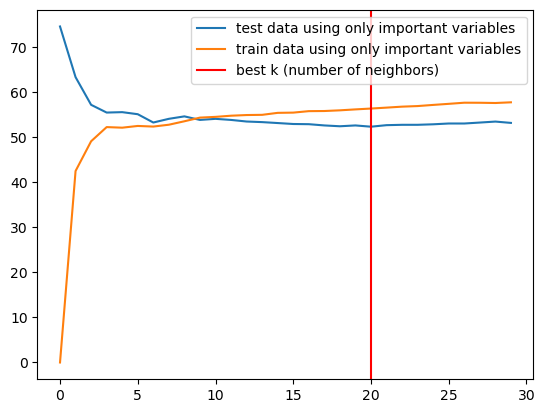

In [30]:
curve = pd.DataFrame(rmse_val_imp) #elbow curve 
plt.plot(curve, label='test data using only important variables')
curve_train = pd.DataFrame(rmse_train_imp) 
plt.plot(curve_train, label='train data using only important variables')
plt.axvline(x = best_kimp, color = 'r', label = 'best k (number of neighbors)')
plt.legend()
plt.show()

In comparison with the previous KNN that used the whole covariates, a KNN based on most important variables requires a larger number of number to achieve a minimum Root Mean Square Error (RMSE). This minimum is even bigger than the minimum provided by the KNN over the whole list of covariates. 

This resut suggest that a KNN over a large number of covariate is slightly better which make perfectly sense, because omitted variables might contribute (even though too small compared to non-omitted variables) toward the calculation of diatance in a KNN. However there is good reason to prefer model over the most important variables as it is more parcinomious, and as a result require a smaller runtime and memory.

##### Question 7 : Recursive or on-line algorithms 

'/home/ensai/MasterSmartData/ML'